# Class exercises

__Exercise 1.__ Suppose a coin is weighted such that, when tossed it comes up heads 70% of times. What is the entropy of this coin?

In [1]:
import math
import numpy as np
p = [0.7, 1 - 0.7]
p = np.array(p)
H = 0 # sum(p * math.log(p[0]))
for i in p:
    H += i * math.log(i)
    
H

-0.6108643020548935

__Exercise 2.__ What is the entropy of a fair dice? 

In [2]:
import math

p = [1/6]*6

H = 0 # sum(p * math.log(p[0]))
H= np.sum([x*np.log(x) for x in p])
H

-1.7917594692280547

__Exercise 3.__ What is the entropy of a dice that shows 
- "1": 20% of times, 
- "2": 10% of times,
- "3": 5% of times,
- "4": 20% of times,
- "5": 30% of times,
- "6": 15% of times    

In [3]:
import math

p = [0.2,0.1,0.05,0.2,0.3,0.06]

H = 0 # sum(p * math.log(p[0]))
H= np.sum([x*np.log(x) for x in p])
H

-1.5538167722541274

__Exercise 4.__ Compute the Kullback-Leibler divergence between the dice of Exercise 2 and the dice of Exercise 3.

In [4]:
import math

q = [0.2,0.1,0.05,0.2,0.3,0.15]
p = [1/6]*6
H = 0 # sum(p * math.log(p[0]))
H= np.sum([x*np.log(x) for x in p])-np.sum([y*np.log(y) for y in q])
H

-0.1221793422466475

# Assignment 4.2

This time we are going to work with the diabetes dataset.


In [5]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

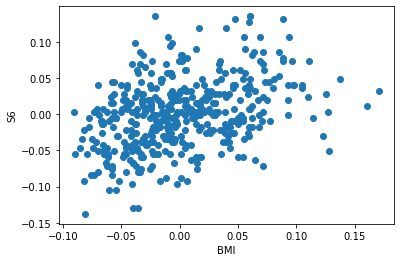

In [7]:
plt.scatter(data[:,2], data[:,9])
plt.xlabel('BMI')
plt.ylabel('S6')
plt.show()

__Exercise 1.__ Investigate the relationship between body mass index (data[:,2]) and S6 (data[:,9]). By using the AIC score seen during lesson, can you verify which hypothesis is better supported by the data?

- there is no relationship (constant)
- the relationship is linear
- the relationship is quadratic
- the relationship is cubic
- the relationship is polynomial of order 4

__Exercise 2.__ Repeat the exercise by using the BIC. Discuss the differences in the results, if any.

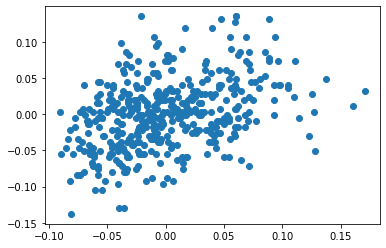

In [8]:
x= data[:,2]
sigma= 10

y= data[:,9]
plt.scatter(x,y)

## Linear relationship

In [9]:
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y,d):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

d=2
x_poly = np.array([x**i for i in range(d)]).T
w_ml, sigma2_ml = fit_poly(x_poly,y,d)
training_linear_ll= Gaussian_loglik(x_poly,y,w_ml,sigma2_ml)
training_linear_ll

755.2042674234679

In [10]:
deviance_linear=-2*training_linear_ll
AIC_linear=deviance_linear+2*d
AIC_linear

-1506.4085348469357

## Quadratic relationship

In [11]:
d=3
x_poly = np.array([x**i for i in range(d)]).T
w_quadratic, sigma2_qqml = fit_poly(x_poly,y,d)
training_qq_ll= Gaussian_loglik(x_poly,y,w_quadratic,sigma2_qqml)
training_qq_ll

757.683770200047

In [12]:
deviance_quadratic=-2*training_qq_ll
AIC_quadratic=deviance_quadratic+2*d
AIC_quadratic

-1509.367540400094

## Cubic relationship

In [13]:
d=4
x_poly = np.array([x**i for i in range(d)]).T
w_cubic, sigma2_cubic = fit_poly(x_poly,y,d)
training_cc= Gaussian_loglik(x_poly,y,w_cubic,sigma2_cubic)
training_cc

757.8083685787344

In [14]:
deviance_cc=-2*training_cc
AIC_cubic=deviance_cc+2*d
AIC_cubic

-1507.6167371574688

## Polynomial order 4

In [15]:
d=5
x_poly = np.array([x**i for i in range(d)]).T
w_pol, sigma2_pol = fit_poly(x_poly,y,d)
training_pol= Gaussian_loglik(x_poly,y,w_pol,sigma2_pol)
training_pol

758.5889364777697

In [16]:
deviance_pol=-2*training_pol
AIC_pol=deviance_pol+2*d
AIC_pol

-1507.1778729555394

In [17]:
def fit_poly(x,y):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

def compute_ll(x,y,w,sigma2):
    predicted= x.dot(w)
    N=x.shape[0]
    gaussian_ll=N/2*np.log(2*3.14*sigma2)+np.sum((y-predicted)**2)/(2*sigma2)
    return 2*gaussian_ll

In [18]:
x= data[:,2]
y=data[:,9]

degrees=[0,1,2,3,4]
list_deviance=[]
list_aaic=[]
list_bic=[]
for d in degrees :
    poly_expanded= np.array([x**i for i in range(d+1)]).T
    solution= fit_poly(poly_expanded,y)
    deviance= compute_ll(poly_expanded,y,solution[0],solution[1])
    list_deviance.append(deviance)
    list_aaic.append(deviance+2*(d+1))
    list_bic.append(deviance+2*d*np.log(poly_expanded.shape[0]))
list_deviance, list_aaic,list_bic

([-1438.2414365060806,
  -1510.6326668276588,
  -1515.591672380817,
  -1515.840869138192,
  -1517.4020049362625],
 [-1436.2414365060806,
  -1506.6326668276588,
  -1509.591672380817,
  -1507.840869138192,
  -1507.4020049362625],
 [-1438.2414365060806,
  -1498.4500470635035,
  -1491.2264328525062,
  -1479.2930098457257,
  -1468.671525879641])

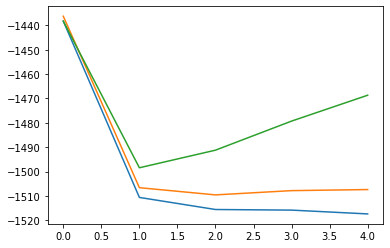

In [19]:
plt.plot(list_deviance, label="deviance") #answer with graphs AIC and BIC
plt.plot(list_aaic,label="aic") #when AIC is dcreasing means there is strong relationship btw the features
plt.plot(list_bic,label="bic")

__Exercise 3.__ Which model would you support between the following:

- target depends on _Age_
- target depends on _Age_ and _Sex_
- target depends on _Age_ and _Body mass index_ 
- target depends on _Age_ and _Body mass index_ and _Average blood pressure_
- target depends on _Age_ and _Sex_ and _Body mass index_ 
- target depends on _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_
- target depends on  _Body mass index_ and _Average blood pressure_

Use any metric (or more metrics) at your discretion, and comment the results

In [20]:
x_1=data[:,:1]#target depends on Age
y=target

loglik = []
w_ml, sigma2_ml= fit_poly(x_1,y)
loglik.append(Gaussian_loglik(x_1,y,w_ml,sigma2_ml))
deviance = -2*np.array(loglik)
AIC=deviance+2*x_1.shape[1]
deviance, AIC

(array([5793.85406852]), array([5795.85406852]))

In [21]:
x_1=data[:,:2] #target depends on Age and Sex
y=target

loglik = []
w_ml, sigma2_ml= fit_poly(x_1,y)
loglik.append(Gaussian_loglik(x_1,y,w_ml,sigma2_ml))
deviance = -2*np.array(loglik)
AIC=deviance+2*x_1.shape[1]
deviance, AIC

(array([5793.84390505]), array([5797.84390505]))

In [22]:
data[:,[0,2]]#target depends on Age and  body mass index
y=target

loglik = []
w_ml, sigma2_ml= fit_poly(x_1,y)
loglik.append(Gaussian_loglik(x_1,y,w_ml,sigma2_ml))
deviance = -2*np.array(loglik)
AIC=deviance+2*x_1.shape[1]
deviance, AIC

(array([5793.84390505]), array([5797.84390505]))

In [23]:
data[:,[0,2,3]]#target depends on Age and  body mass index and Average blood pressure
y=target

loglik = []
w_ml, sigma2_ml= fit_poly(x_1,y)
loglik.append(Gaussian_loglik(x_1,y,w_ml,sigma2_ml))
deviance = -2*np.array(loglik)
AIC=deviance+2*x_1.shape[1]
deviance, AIC

(array([5793.84390505]), array([5797.84390505]))

In [24]:
data[:,[0,1,2]]#target depends on Age and Sex and Body mass index
y=target

loglik = []
w_ml, sigma2_ml= fit_poly(x_1,y)
loglik.append(Gaussian_loglik(x_1,y,w_ml,sigma2_ml))
deviance = -2*np.array(loglik)
AIC=deviance+2*x_1.shape[1]
deviance, AIC

(array([5793.84390505]), array([5797.84390505]))